# Pràctica 9: Reinforment learning

#### NOM: Miquel Monge Dalmau

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. [Multi-armed-bandits](#A.-Multi-Armed-Bandits) **(50%)**
* B. [OpenAI Gym](#OpenAI-Gym) **(50%)**


## Introducció

En aquesta pràctica serà diferent a les anteriors. Com que no teniu massa temps, hem decidit que no haureu d'implementar algorismes, sinò entendre els conceptes bàsics i explicar-los.

Per aquest motiu, farem ús de 2 entorns que ens ajudin a entendre com funciona un algorisme d'aprenentatge per reforç (Reinforcement Learning).


<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Markov_diagram_v1.svg" width="80%">



# A. Multi-Armed Bandits




## Multi-Armed Bandits and Reinforcement Learning

### A Gentle Introduction to the Classic Problem with Python Examples

Aplicacions de MAB: [link](https://arxiv.org/abs/1904.10040). Post extret de la següent web: [link](https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da)

![Photo by [Carl Raw](https://unsplash.com/@carltraw?utm_source=medium&utm_medium=referral) on [Unsplash](https://unsplash.com?utm_source=medium&utm_medium=referral)](https://cdn-images-1.medium.com/max/10238/0*2orlZg7aPX5dhdBF)

Multi-armed bandit problems are some of **the simplest** reinforcement learning (RL) problems to solve. We have an agent which we allow to choose actions, and each action has a reward that is returned according to a given, underlying probability distribution. The game is played over many episodes (single actions in this case) and the goal is to maximize your reward.

**An easy picture is to think of choosing between *k*-many [*one-armed bandits*](https://en.wikipedia.org/wiki/Slot_machine) (i.e. slot machines) or one big slot machine with *k* arms. Each arm you pull has a different reward associated with it. You’re given 1,000 quarters, so you need to develop some kind of strategy to get the most bang for your buck.**

One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but, as stated before, each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the **explore-exploit dilemma**. Forms of this basic problem come up in areas outside of AI and RL, such as in [choosing a career](https://joshkaufman.net/explore-exploit/), [finance](https://www.aaai.org/ocs/index.php/IJCAI/IJCAI15/paper/viewFile/10972/10798), [human psychology](https://econ.arizona.edu/sites/econ/files/wilsonetal_jepgeneral2014_print.pdf), and even [medical ethics](http://www.pnas.org/content/106/52/22387) (although, I think my favorite proposed use case relates to the suggestion that, due to its richness, it be given to Nazi Germany during WWII, [“as the ultimate form of intellectual sabotage.”](https://people.eecs.berkeley.edu/~russell/classes/cs294/s11/readings/Gittins:1979.pdf)).



## TL;DR

We introduce multi-armed bandit problems following the framework of [Sutton and Barto’s book](https://amzn.to/2Q2mxxn) (affiliate link of the author of the post) and develop a framework for solving these problems as well as examples. 

We’ll focus on:
* [**ϵ−greedy**](#%CF%B5-Greedy-Methods)
* [**ϵ−decay**](#%CF%B5-Decay-Strategies)
* [**optimistic strategies**](#Optimistic-Initial-Value)



## Problem Setup

To get started, let’s describe the problem in a bit more technical detail. What we wish to do, is develop an estimate $Qt(a)$:

![](https://cdn-images-1.medium.com/max/2000/1*n6jigGk161weIu8xHYQT_A.png)

Where $Qt(a)$ is the estimated, expected reward ($Rn$), when action $An$ is taken at step $n$. 

We’re going to iteratively build a model that will converge towards the true value of each action. We’re going to use a Gaussian (normal) distribution for all of the underlying probability distributions that we’ll explore so that the mean corresponds to the true value (after all, given enough samples, we would expect our rewards to converge to the mean of the selected action).

The **simplest way to proceed** is to take the **greedy action** or take the action we think will maximize our reward at each time step. Another way of writing this is:

![](https://cdn-images-1.medium.com/max/2000/1*S3nJWVy8oQE0gTDnh2D0jw.png)

We can denote this maximum expectation or greedy action as $A^*n$. This is the *exploit* side of our aforementioned **explore-exploit dilemma**, and it makes lots of sense if the goal is to maximize our reward. Of course, doing this repeatedly only works well once we have a good sense of our expected rewards for each actions (unless we get rather lucky). So, we need to figure out an algorithm that explores enough of our search space so that we can exploit the best actions.

Before jumping into this, there’s one last concept to introduce. In typical RL applications, we may need hundreds of thousands of iterations, if not millions or more. It quickly becomes very computationally intensive to run simulations of these sorts and keep track of all that data just to calculate the average reward. To avoid this, we can use a handy formula so that all we need to track are two values: the mean and number of steps taken. If we need to calculate the mean at step $n$, $m_n$, we can do it with the previous mean, $m_{n−1}$ and $n$ as follows:

![](https://cdn-images-1.medium.com/max/2000/1*IGzEQ2Ze5N6ijgApE-Tynw.png)

With that, we can start to develop strategies for solving our *k-bandit* problems.



## ϵ-Greedy Methods

We briefly talked about a pure-greedy method, and I indicated that on its own it won’t work very well. Consider if you implement a pure-greedy method, you take one action, $A_n=a_1$, at $n=1$ and get a reward. Well, then this becomes your highest reward (assuming it is positive) and you simply repeat $a_1 ​∀ n$ (take action $a_1$ for all steps $n$). 

To encourage a bit of exploration, we can use ϵ-greedy which means that we explore another option with a probability of ϵ. This provides a bit of noise into the algorithm to ensure you keep trying other values, otherwise, you keep on exploiting your maximum reward.

Let’s turn to Python to implement our *k-*armed bandit.



## Building a greedy k-Armed Bandit

We’re going to define a class called `eps_bandit` to be able to run our experiment. This class takes number of arms, `k`, epsilon value `eps`, number of iterations `iter` as inputs. We'll also define a term `mu` that we can use to adjust the average rewards of each of the arms.


In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

%matplotlib inline

In [2]:
# global parameters
k = 10           # number of bandits
iters = 1000     # iters (steps or pulls) inside an episode
episodes = 500   # number of episodes

In [3]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        
        self.reset()

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def reset(self):
        # Resets results while keeping settings

        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters) #for plotting purposes
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

There are plenty of different ways to define this class. I did it so that once we initialize our problem, we just call the run() method and can examine the outputs. By default, the average rewards for each arm are drawn from a normal distribution around 0. Setting mu="sequence" will cause the rewards to range from 0 to *k-1* to make it easy to know which actions provide the best rewards when evaluating the results and which actions were taken. Finally, you could also set your own average rewards by passing values to mu.

Let’s set up some comparisons using different values of ϵ\epsilonϵ. For each of these, we’ll set k=10, run 1,000 steps for each episode and run 500 episodes. After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.

100%|██████████| 500/500 [00:15<00:00, 33.17it/s]


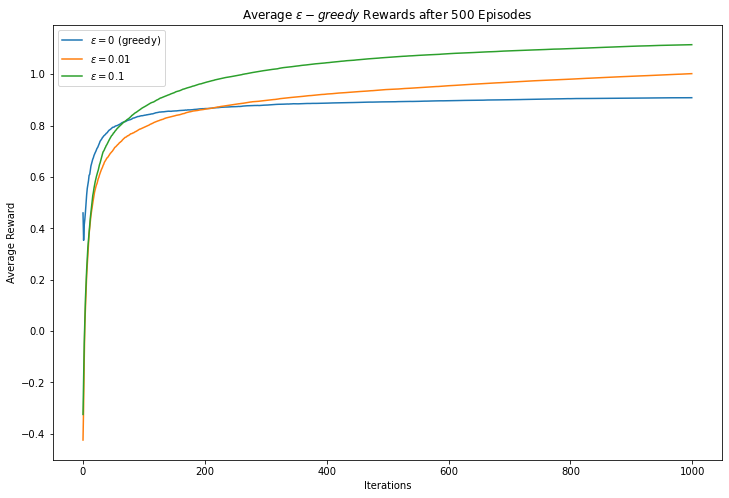

In [4]:
eps_000_rewards = np.zeros(iters)
eps_001_rewards = np.zeros(iters)
eps_010_rewards = np.zeros(iters)

#init bandits behaviour
behaviour = eps_bandit(k, 0.00, iters).mu.copy()

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_000 = eps_bandit(k, 0.00, iters, behaviour)
    eps_001 = eps_bandit(k, 0.01, iters, eps_000.mu.copy())
    eps_010 = eps_bandit(k, 0.1, iters, eps_000.mu.copy())

    # Run experiments
    eps_000.run()
    eps_001.run()
    eps_010.run()

    # Update long-term averages
    eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
    eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
    eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_001_rewards, label="$\epsilon=0.01$")
plt.plot(eps_010_rewards, label="$\epsilon=0.1$")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes")
plt.show()

Looking at the results, the greedy function under performs the other two consistently, with ϵ=0.01 coming in between the two and ϵ=0.1 performing the best of the three here. Below, we can see the effect is clearer using the sequence argument, and can get a feel for how often the optimal action is taken per episode because the averages remain consistent across episodes.

100%|██████████| 500/500 [00:12<00:00, 39.17it/s]


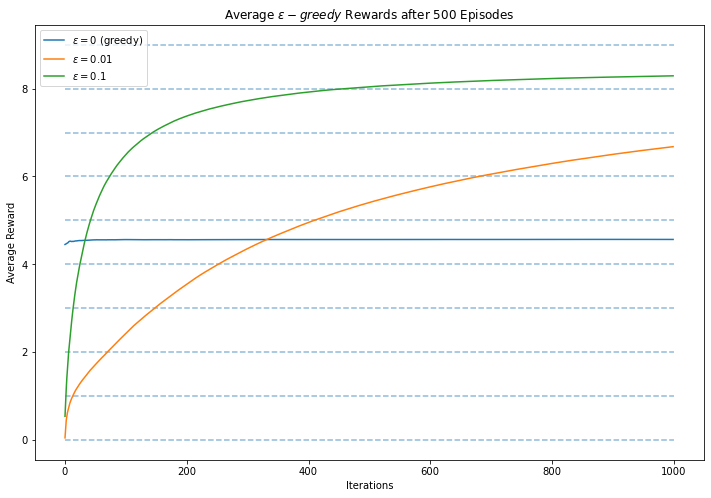

In [5]:
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()

    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (eps_1.k_n - eps_1_selection) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title(f"Average $\epsilon-greedy$ Rewards after {episodes} Episodes")
plt.show()

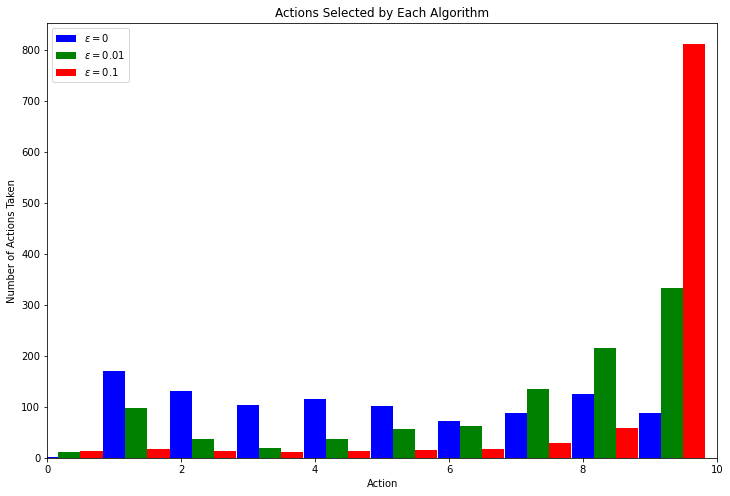

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.2064,17.1022,13.0920,10.3994,11.6000,10.2000,7.2000,8.8000,12.6000,8.8000
$\epsilon=0.01$,1.0716,9.7310,3.6874,1.9334,3.6314,5.6208,6.1886,13.4052,21.4772,33.2534
$\epsilon=0.1$,1.3116,1.6380,1.2824,1.1770,1.4236,1.4958,1.7096,2.8774,5.8620,81.2226


In [6]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, width = 0.33, color='b', label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection, width=0.33, color='g', label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, width=0.33, color='r', label="$\epsilon=0.1$")
plt.legend()
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection, eps_1_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', '$\epsilon=0.01$', '$\epsilon=0.1$'],
                  columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

Viewing the average selection of the algorithms, we see why the larger ϵ value performs well, it takes the optimal selection 80% of the time.

Play around with the different values of both ϵ and *k* to see how these results change. For example, decreasing the search space would likely benefit smaller values of ϵ as exploration would be less beneficial and vice versa. Additionally, increasing the number of iterations will begin to benefit the lower value of ϵ because it will have less random noise.

## ϵ-Decay Strategies

The ϵ-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. It would be better for these to settle on an optimal solution and continue to exploit it. To this end, we can introduce ϵ-decay which reduces the probability of exploration with every step. This works by defining ϵ as a function of the number of steps, *n*.

![](https://cdn-images-1.medium.com/max/2000/1*OHcZPVCqG3dqIVFtpv7B-Q.png)

Where β<1 is introduced as a scaling factor to reduce the scaling rate so that the algorithm has sufficient opportunity to explore. In this case, we also include +1 in the denominator to prevent infinities from appearing. Given this, we can make a few small changes to our previous class of bandits to define an eps_decay_bandit class that works on the same principles.

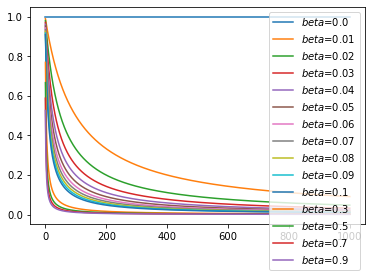

In [7]:
x=np.linspace(1, 1000, 1000)
for b in np.arange(10)/100:
    plt.plot(1/(1+x*b),label=f'$beta$={b}')
for b in np.arange(1,11,2)/10:
    plt.plot(1/(1+x*b),label=f'$beta$={b}')
plt.legend()
plt.show()

In [8]:
class eps_decay_bandit:
    '''
    epsilon-decay k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, iters, mu='random'):
        # Number of arms
        self.k = k
        # Number of iterations
        self.iters = iters

        self.reset()
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def reset(self):
        # Resets results while keeping settings

        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters) #for plotting purposes
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

Now running the code:

100%|██████████| 500/500 [00:09<00:00, 52.58it/s]


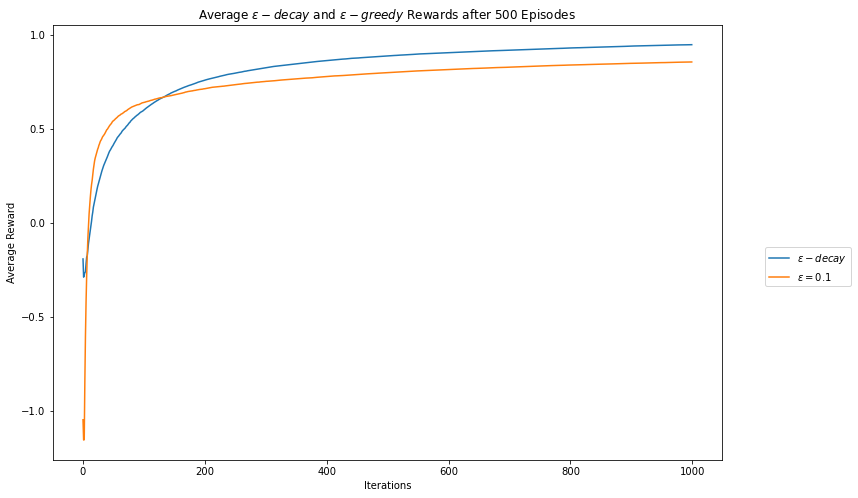

In [9]:
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

#init bandits behaviour
behaviour = eps_decay_bandit(k, iters).mu.copy()

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters, behaviour)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())

    # Run experiments
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and " + "$\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

The ϵ-decay strategy outperforms our previous best algorithm as it sticks to the optimal action once it is found.

There’s one last method to balance the explore-exploit dilemma in *k-bandit* problems, **optimistic initial values**.

## Optimistic Initial Value

This approach differs significantly from the previous examples we explored because it does not introduce random noise to find the best action, *A*_n*​. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

For this implementation, we don’t need a new class. Instead, we can simply use our eps_bandit class and set ϵ=0 and provide high, initial values for the estimates. Also, I like to initialize the pull count for each arm as 1 instead of 0 to encourage slightly slower convergence and ensure good exploration.

100%|██████████| 500/500 [00:13<00:00, 36.07it/s]


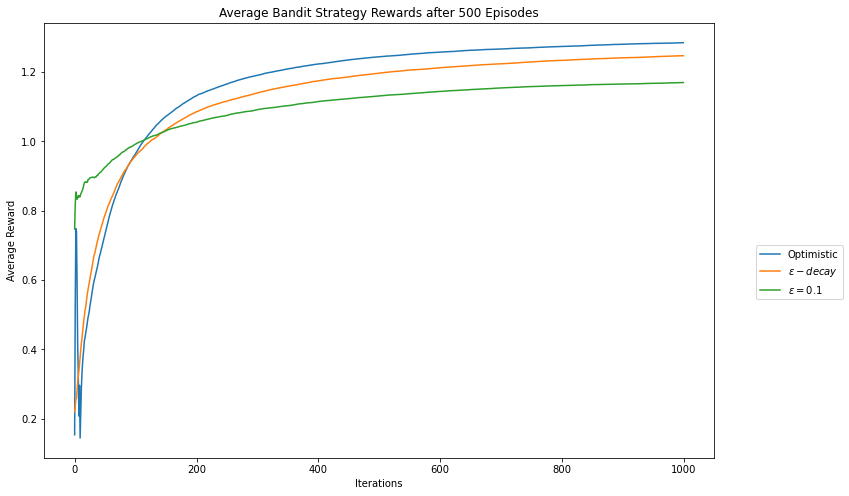

In [10]:
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Select initial values
oiv_init = 5.

#init bandits behaviour
behaviour = eps_bandit(k, 0, iters).mu.copy()

# Run experiments

for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters, behaviour)
    oiv_bandit.k_reward += oiv_init
    oiv_bandit.k_n += 1 #np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())

    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    oiv_rewards = oiv_rewards + (oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + str(episodes) + " Episodes")
plt.show()

We can see that, in this case, the optimistic initial value approach outperformed both our ϵ−greedy and the ϵ−decay algorithms. We can see too, the estimates the algorithm has for each of arms in the last episode.

In [11]:
df = pd.DataFrame({"number of selections": oiv_bandit.k_n - 1,
                  "actual reward": oiv_bandit.mu,
                  "estimated reward": oiv_bandit.k_reward})
df = df.applymap(lambda x: np.round(x, 2))
df['number of selections'] = df['number of selections'].astype('int')
df

,number of selections,actual reward,estimated reward
0,11,0.85,1.22
1,939,1.32,1.32
2,16,0.84,1.24
3,7,0.45,1.23
4,3,-0.69,0.45
5,1,-0.23,1.17
6,4,-0.30,1.13
7,2,-0.65,0.75
8,15,1.33,1.29
9,2,-1.49,0.30


The estimates are far off the actual rewards in all cases except the one with more than 900 pulls. This highlights a lot of what we’ll be doing in reinforcement learning more generally. We don’t necessarily care about acquiring accurate representations of the environment we are interacting with. Instead, we intend to **learn optimal behavior** in those situations and seek to behave accordingly. This can open up a whole discussion about model-free versus model-based learning that we’ll have to postpone for another time.

There are [other bandit methods](https://www.datahubbs.com/multi-armed-bandits-reinforcement-learning-2/) that we will explore such as the gradient bandits, upper confidence bound (UCB) methods, and nonstationary problems. Plus, many others like [dueling bandits](http://www.sciencedirect.com/science/article/pii/S0022000012000281?via%3Dihub), [cluster bandits](https://arxiv.org/abs/1401.8257), [collaborative filtering bandits](https://arxiv.org/abs/1502.03473), [spatially correlated bandits](http://www.biorxiv.org/content/biorxiv/early/2017/04/28/106286.full.pdf), [distributed bandtis](https://arxiv.org/abs/1604.07706), [adversarial bandits](http://mercurio.srv.dsi.unimi.it/~cesabian/Pubblicazioni/J18.pdf), and [contextual bandits](http://proceedings.mlr.press/v32/agarwalb14.pdf) which are open to exploration. Starting to wonder if we haven’t been hit with [intellectual sabotage…](https://mlwave.com/multi-armed-bandits-algorithms-made-easy/)


#### Preguntes

**1.** Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus

**2.** Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

**3.** Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

**4.** Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

**5.** Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

**6.** Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?

**7.** Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

**8.** Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

#### Preguntes

**1.** Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus

100%|██████████| 1/1 [00:00<00:00, 28.94it/s]


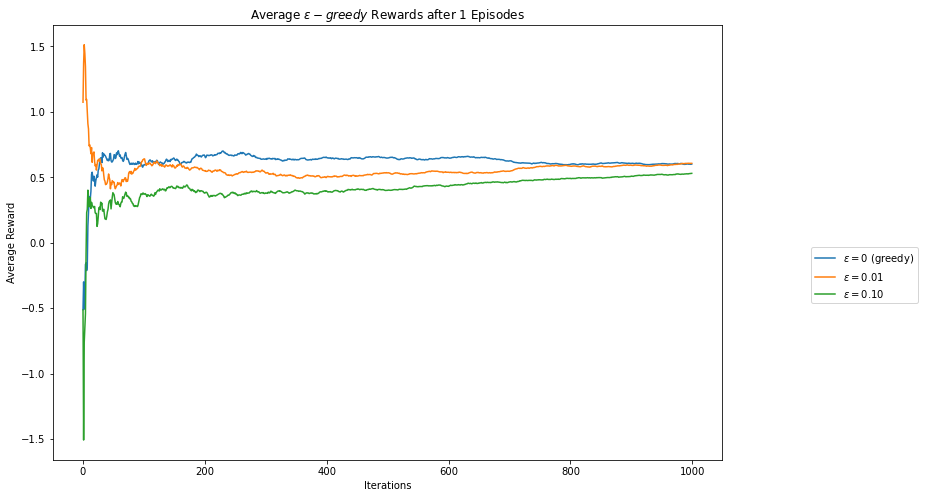

100%|██████████| 50/50 [00:01<00:00, 39.20it/s]


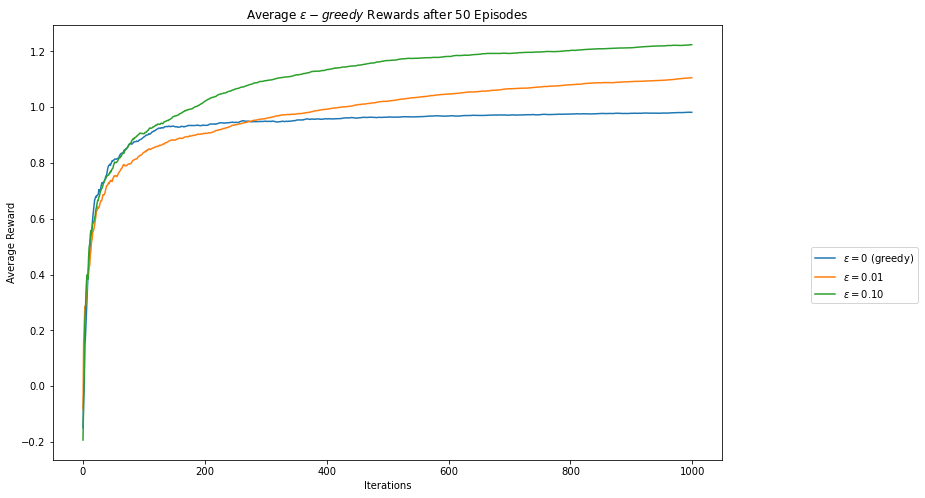

100%|██████████| 100/100 [00:02<00:00, 35.87it/s]


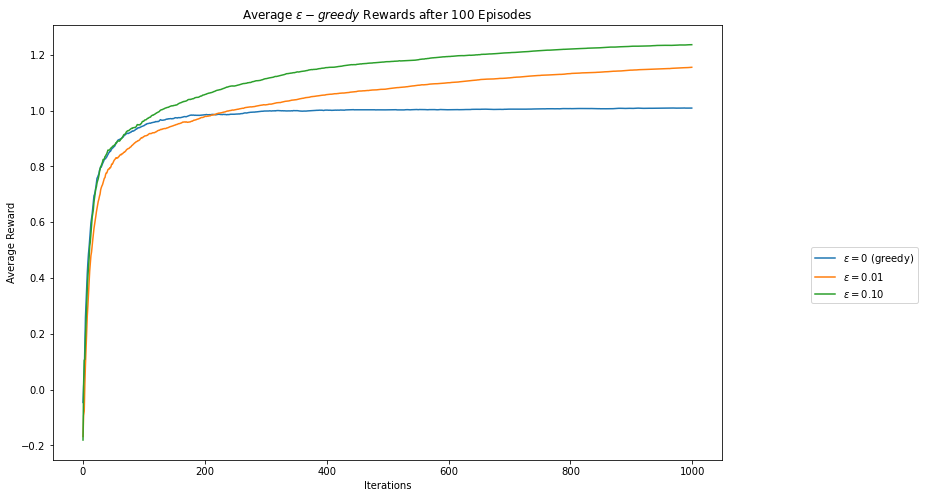

100%|██████████| 200/200 [00:05<00:00, 33.80it/s]


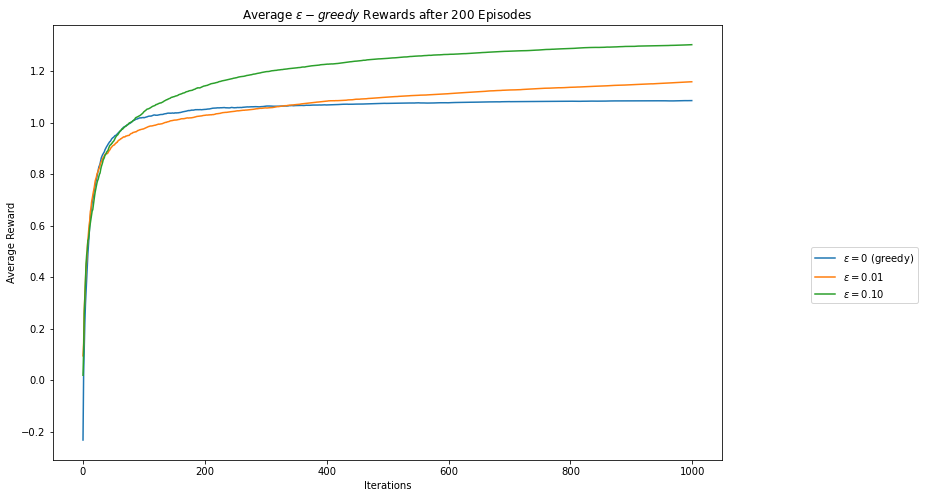

100%|██████████| 500/500 [00:14<00:00, 34.76it/s]


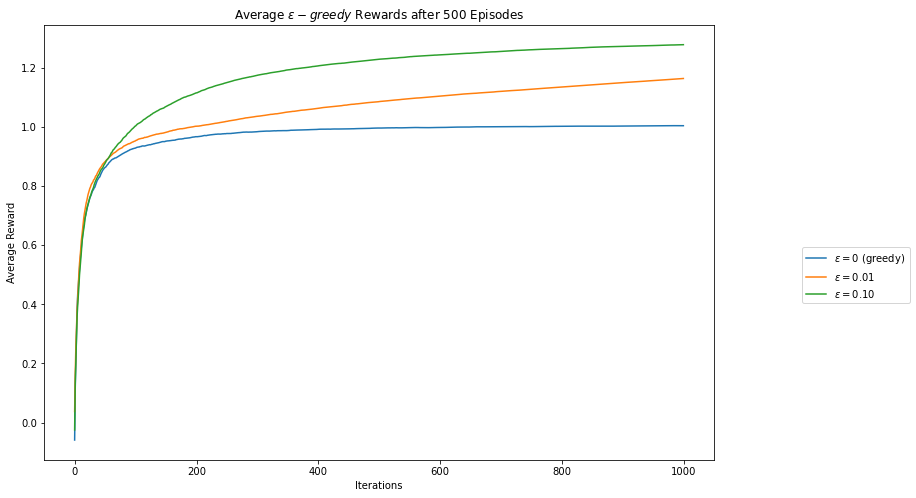

100%|██████████| 1000/1000 [00:25<00:00, 38.73it/s]


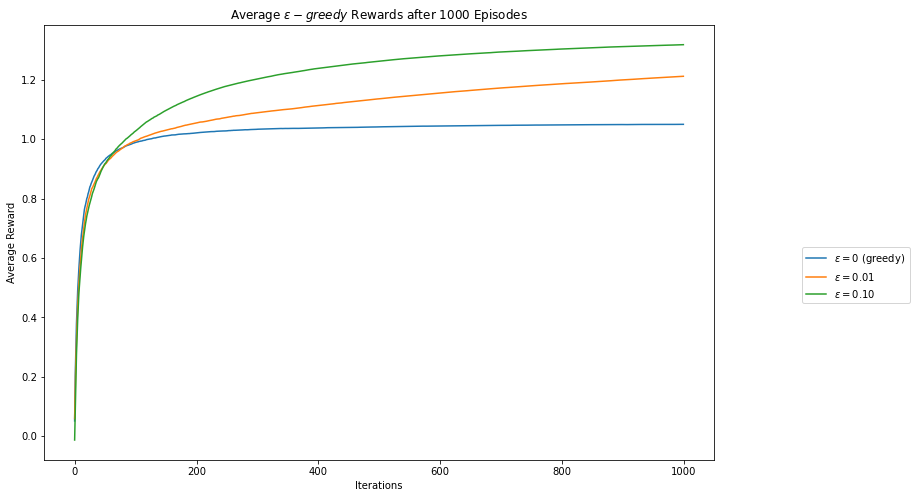

In [12]:
valors_episodes= [1,50,100,200,500,1000]

for episodi in valors_episodes:
    eps000_rewards = np.zeros(iters)
    eps001_rewards = np.zeros(iters)
    eps010_rewards = np.zeros(iters)

    # Run experiments
    for i in tqdm.tqdm(range(episodi)):
        # Initialize bandits
        eps000 = eps_bandit(k, 0.00, iters)
        eps001 = eps_bandit(k, 0.01, iters, eps000.mu.copy())
        eps010 = eps_bandit(k, 0.10, iters, eps000.mu.copy())

        # Run experiments
        eps000.run()
        eps001.run()
        eps010.run()


        #El promig de la recompensa de tots els episodis per cada iteració
        eps000_rewards = eps000_rewards + (eps000.reward - eps000_rewards) / (i + 1)
        eps001_rewards = eps001_rewards + (eps001.reward - eps001_rewards) / (i + 1)
        eps010_rewards = eps010_rewards + (eps010.reward - eps010_rewards) / (i + 1)


    plt.figure(figsize=(12,8))
    plt.plot(eps000_rewards, label="$\epsilon=0$ (greedy)")
    plt.plot(eps001_rewards, label="$\epsilon=0.01$")
    plt.plot(eps010_rewards, label="$\epsilon=0.10$")
    plt.legend(bbox_to_anchor=(1.3, 0.5))
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")
    plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodi)  + " Episodes")
    plt.show()

Amb valors baixos d'*episodes* com 1 o 2, la cerca només es repeteix un o dos cops, i podem considerar que l'exploració que s'està fent és aleatòria. Essent així, el valor de la mitjana no és veritablement la mitjana sinó que són els valors que obtenim directament (en el cas d'un episodi). Per tant, els resultats no ens proporcionen informació vàlida.

En la gràfica podem veure les alteracions d'aquesta cerca aleatòria, essent així, veiem que el valor mitjà baixa i de cop torna a pujar. Veiem que es fa una exploració inicial en els tres valors d'eps i després el *reward* augmenta (en diferent mesura per a cadascun).

A partir dels 10 episodis es comença a observar la tendència general del model en cada valor d'epsilon. Tot i això, al prinicpi els tres augmenten de la mateixa forma, però arriba un moment (aproximadament sobre la iteració 100) que els camins és comencen a separar i es veu clarament que el model amb millors resultats és el que obté una exploració del 10% (eps = 0.1).

Provant diferents valors per a aquests eps sabem que a partir de 0.1 els resultats no milloren gaire més, de fet empitjoren, per la qual cosa es destina una part major a la cerca aleatòria d'altres camins. Per tant, podem dir que el valor 0.1 és un dels valors òptims d'epsilon per maximitzar l'espai de cerca segons l'algorisme e-gready.

**2.** Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

100%|██████████| 500/500 [00:00<00:00, 1233.37it/s]


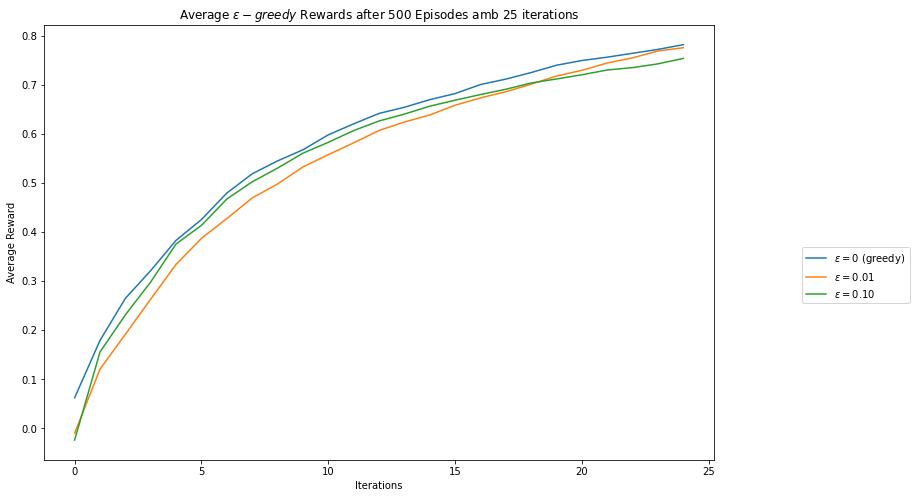

100%|██████████| 500/500 [00:01<00:00, 464.15it/s]


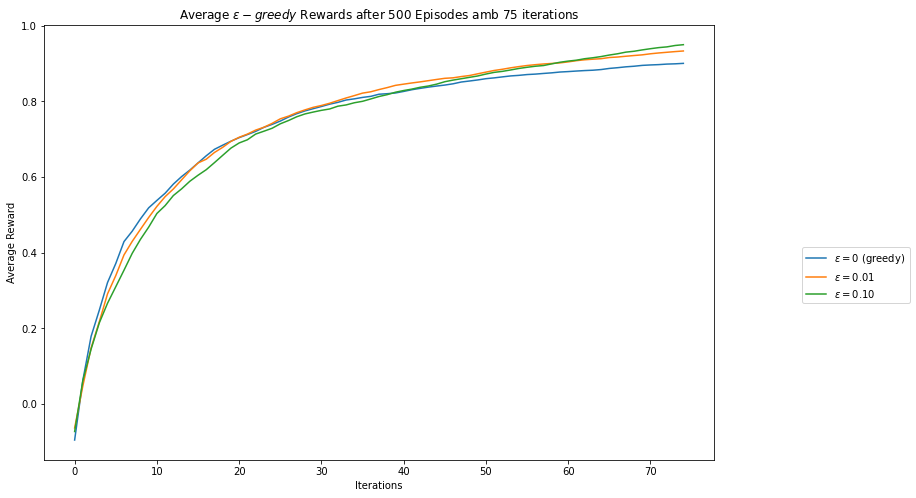

100%|██████████| 500/500 [00:09<00:00, 51.01it/s]


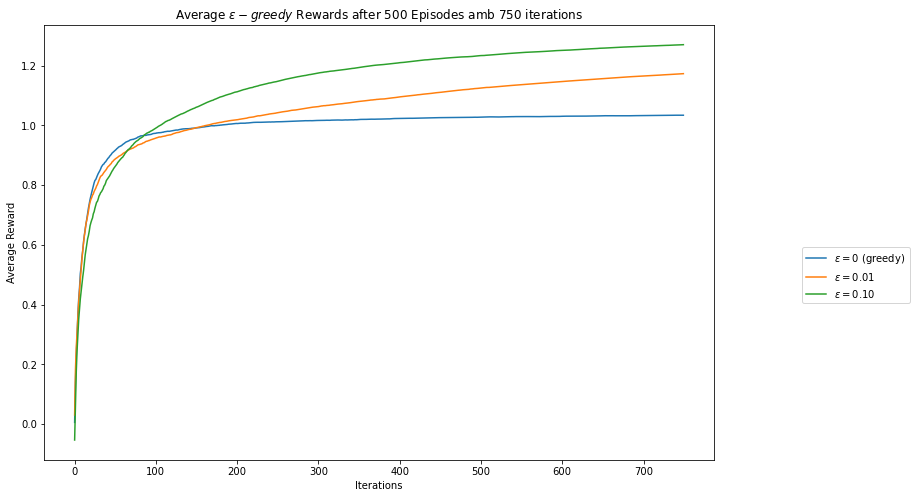

100%|██████████| 500/500 [00:13<00:00, 38.36it/s]


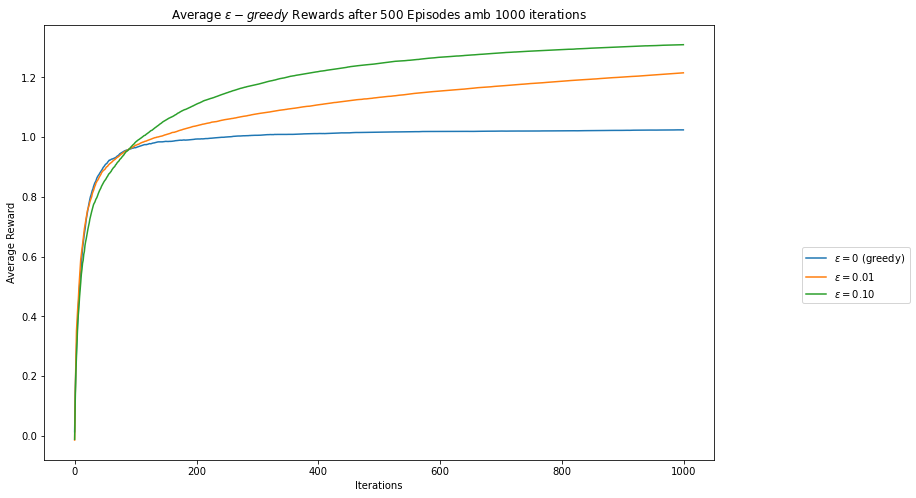

In [13]:
episodi= 500
valors_iteracions= [25, 75, 750, 1000]

for iters in valors_iteracions:
    eps000_rewards = np.zeros(iters)
    eps001_rewards = np.zeros(iters)
    eps010_rewards = np.zeros(iters)
    # Run experiments
    for i in tqdm.tqdm(range(episodi)):
        # Initialize bandits
        eps000 = eps_bandit(k, 0.00, iters)
        eps001 = eps_bandit(k, 0.01, iters, eps000.mu.copy())
        eps010 = eps_bandit(k, 0.10, iters, eps000.mu.copy())

        # Run experiments
        eps000.run()
        eps001.run()
        eps010.run()


        #El promig de la recompensa de tots els episodis per cada iteració
        eps000_rewards = eps000_rewards + (eps000.reward - eps000_rewards) / (i + 1)
        eps001_rewards = eps001_rewards + (eps001.reward - eps001_rewards) / (i + 1)
        eps010_rewards = eps010_rewards + (eps010.reward - eps010_rewards) / (i + 1)


    plt.figure(figsize=(12,8))
    plt.plot(eps000_rewards, label="$\epsilon=0$ (greedy)")
    plt.plot(eps001_rewards, label="$\epsilon=0.01$")
    plt.plot(eps010_rewards, label="$\epsilon=0.10$")
    plt.legend(bbox_to_anchor=(1.3, 0.5))
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")
    plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodi)  + " Episodes amb " + str(iters) + " iterations")
    plt.show()

Per a nombres molt petits d'iteracions podem comprovar que tots els valors d'eps creixen molt ràpid. Aquesta és la primera fase d'exploració que s'ha de fer abans de explotar la que es cregui adïent. 

Entre el nombre d'iteracions de 50 i 100 és quan l'algoritme comença a diferenciar entre diferents valors d'eps, doncs amb 50 iteracions tots els mètodes creixen més o menys de manera similar i fins i tot el mètode de greedy pur (eps=0) no es troba en última posició en el ranquing de reward. Amb el valor de 0.1 encara no ha optimitzat quina és la millor màquina i és per aquest motiu que no obté els millors rewards de mitjana. 

Després de la iteració 100 els valors finals es decanten pel que amb més iteracions podem veure que és el resultat final.

La millor opció és amb una exploració del 10%, després del 1% i per últim sense exploració aleatòria excepte la del principi. Després de la iteració 100 les gràfiques són molt similars entre elles, això és perquè els resultats convergeixen.

**3.** Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

La ***policy*** és l'estratègia de decisió que apliquem donat un estat i una recompensa. A l'esquema de l'inici de la pràctica veiem com l'agent, amb aquests dos factors d'entrada, decideix una acció de sortida. Les característiques que fan que l'agent determini una acció o altra venen determinades per la política. En aquest problema la decisió és simple: es tracta d'escollir el braç (*arm*) que ens retorni més reward. Ho veiem en la línia de codi --> (a = np.argmax(self.k_reward)).

Per al problema d'escollir un braç per fer el pull i obtenir el millor benefici no hi ha *entorn*, pel fet que s'escull (o no) un braç del qual tirar.

Un cop determinada la política, observem quin és el següent pas a donar, si fer **explotació** o **exploració**. El pas que respecte a l'*observació* correspon a les primeres línies del codi de la funció *pull()*, dues condicions en les quals el decay determina el braç pel qual ha de seguir: el que indica la política o un aleatori.

En aquest cas el ***reward*** s'escull de forma aleatòria a continuació de les condicions de la funció *pull()*. Ho veiem en la línia de codi --> (reward = np.random.normal(self.mu[a], 1)) i escull un valor aleatòri normal amb desviació 1. Per a cada execució el valor variarà i el millor braç serà diferent.

Després del procés de tria entre braços, s'ha de fer el "pull" o "*acció*" d'estirar un braç. Correspon a les quatre últimes línies de codi de la funció *pull()* i és simplement aplicar els diferents càlculs numèrics que impliquen escollir aquest braç, actualitzar els comptadors i tornar a començar el procés.

A continuació es troba la part de codi que defineix la política, reward, action, etc., d'*eps_bandit*.

In [14]:
    def pull(self):
        # Generate random number
        #OBSERVATION
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            #POLICY
            # Take greedy action
            a = np.argmax(self.k_reward)
        
        #REWARD
        reward = np.random.normal(self.mu[a], 1)
        
        #ACTION
        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

**4.** Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

En trobar-se a la primera iteració agafa un valor aleatori de braç, depenent del percentatge de l'epsilon també agafa un valor aleatori, i en la resta de casos agafa el valor del reward més elevat. En aquest últim cas agafa el primer valor més gran que troba, és per aquest motiu que en la gràfica anterior surt visualment com s'afavoreix els valors més petits de braços. Si troba el valor màxim al braç 1, 3 i 7 doncs sempre agafa l'1, per exemple. 

La solució que proposo per millorar aquest codi i trobar-nos amb una exploració més igualitària és escollir els valors més grans i després fer un random d'aquests valors.

**5.** Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

Un valor de eps=0 implica aplicar un algoritme greedy pur, és a dir, la primera millor opció que trobi en el moment és la que expandeix mentre sigui la millor, i si en alguna determinada iteració troba una branca o, en aquest cas, braç millor, doncs continua explotant aquest.

Tot el contrari seria igualar eps=1, això vol dir que a cada pas el braç que prova és aleatori i així per cada vegada. No segueix cap algoritme sinó que ho fa de forma aleatòria. És la comparació entre explotació pura (0) i exploració pura (1). En ambdós casos s'ha comprovat que hi ha mètodes més eficients que combinen les dues tècniques.

**6.** Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?  


L'única part del codi que canvia és la funció pull.

In [ ]:
# eps_bandit (funció pull)
p = np.random.rand()
if self.eps == 0 and self.n == 0:
    a = np.random.choice(self.k)
elif p < self.eps:
    # Randomly select an action
    a = np.random.choice(self.k)
else:
    # Take greedy action
    a = np.argmax(self.k_reward)

In [ ]:
# eps_decay_bandit (funció pull)
p = np.random.rand()
if p < 1 / (1 + self.n / self.k):
    # Randomly select an action
    a = np.random.choice(self.k)
else:
    # Take greedy action
    a = np.argmax(self.k_reward)

Pel primer cas, el valor del percentatge d'exploració és una constant i ve determinada en la inicialització del programa. En canvi, en el codi amb el *decay_bandit* aquest percentatge s'actualitza en cada iteració i ve determinat pel valor n i un valor beta. Això és perquè a l'inici de l'episodi és bo que explori un nombre més gran de cops per tal de trobar el braç que definitivament ha d'explotar i, posteriorment, no cal que realitzi una nova exploració en un altre braç de forma tan freqüent. El codi d'eps_decay_bandit és més òptim, així com ho podem confirmar amb la gràfica de sortida que es comparen ambdós mètodes.

**7.** Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

El valor que han escollit de beta és 1/k. L'operació que realitza per comparar és: p < 1 / (1 + self.n / self.k).

Per a un valor de k = 10 com és el cas que estem treballant la gràfica seria:

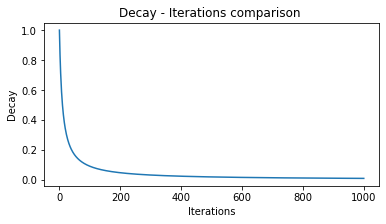

In [16]:
l = []
for i in range(1000):
    l.append(1 / (1 + i / 10))

plt.figure(figsize=(6,3))
plt.plot(l)
plt.xlabel("Iterations")
plt.ylabel("Decay")
plt.title("Decay - Iterations comparison ")
plt.show()

Com podem observar, a mesura que augmenta la n, el decay disminueix.

**8.** Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

El reward mitjà per al ***eps_bandit*** comença creixent de forma molt ràpida perquè destina més part a l'explotació i troba d'una forma molt eficient la màquina que li aporta més benefici. El que passa és que aquest percentatge d'exploració es manté constant i encara que hagi trobat la màquina que necessita, cada vegada explora una nova i aquest reward mitjà disminueix notablement fins a arribar a un moment en què s'estabilitza.

Pel que fa al ***eps_decay_bandit***, li costa més créixer des d'un principi envers la resta de mètodes, però en trobar al braç més òptim s'obtenen millors resultats que amb el eps_bandit. L'inconvenient que he comentat anteriorment (encara que trobi el camí segueix dedicant un percentatge de cops a l'exploració) ara s'ha solventat d'una forma eficient: reduint en cada pas aquest percentatge d'exploració.

L'últim mètode és força diferent pel fet que inicialitza tots els valor amb un reward mitjà més gran que 0 (en aquest cas 5) i, a l'inici, explora totes les branques que s'obtenen fins que troba la que inicialment li retorna millors resultats i explota aquesta fins al final o fins que un resultat li doni més baix que amb un altre braç. És a dir, totes comencen amb un valor de 5, si la primera li retorna un 0.6, la segona un 0.2, la tercera un 0.9, etc, es queda amb la millor opció d'aquestes i la segueix explorant de la mateixa manera que en el codi eps_bandit amb un epsilon a 0. Com podem observar a la gràfica, primer obté uns resultats força negatius perquè ha de mirar tots els braços i decidir després de les primeres iteracions quin és el que li retorna millors resultats. Posteriorment, creix de forma molt més ràpida que la resta de mètodes fins a estabilitzar-se i obtenir millors resultats.

# OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.

The gym library is a collection of test problems —[environments](https://gym.openai.com/envs/#classic_control)— that you can use to work out your reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

install gym & pyglet

    `pip install gym`
    
    `pip install pyglet`

## Environments

Here’s a bare minimum example of getting something running. This will run an instance of the CartPole-v0 environment for 1000 timesteps, rendering the environment at each step. You should see a window pop up rendering the classic cart-pole problem:


In [17]:
%matplotlib inline
import gym
import tqdm

env = gym.make('CartPole-v0')
env.reset()
for _ in tqdm.tqdm(range(200)):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

  4%|▍         | 9/200 [00:00<00:07, 27.14it/s]/home/mdalm/anaconda3/lib/python3.8/site-packages/gym/envs/classic_control/cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(
100%|██████████| 200/200 [00:03<00:00, 55.62it/s]


Normally, we’ll end the simulation before the cart-pole is allowed to go off-screen. More on that later. For now, please ignore the warning about calling step() even though this environment has already returned `done` = True.



## Observations
If we ever want to do better than take random actions at each step, it’d probably be good to actually know what our actions are doing to the environment.

The environment’s `step` function returns exactly what we need. In fact, `step` returns four values. These are:

* `observation` (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
* `reward` (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
* `done` (boolean): whether it’s time to `reset` the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
* `info` (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an `action`, and the environment returns an `observation` and a `reward`.

<img src="https://www.mathworks.com/help/reinforcement-learning/ug/agent_diagram.png" width="50%">



The process gets started by calling `reset()`, which returns an initial `observation`. So a more proper way of writing the previous code would be to respect the `done` flag:


In [18]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(200):
    observation = env.reset()
    for t in range(10000):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[-0.03277262 -0.03257325 -0.02378885 -0.02774632]
[-0.03342408  0.16288164 -0.02434378 -0.32783896]
[-0.03016645  0.35834154 -0.03090056 -0.6280983 ]
[-0.02299962  0.16366418 -0.04346252 -0.34530497]
[-0.01972633 -0.03081343 -0.05036862 -0.06663801]
[-0.0203426   0.16499312 -0.05170138 -0.37477747]
[-0.01704274 -0.02935778 -0.05919693 -0.09883408]
[-0.01762989  0.16656043 -0.06117361 -0.40959036]
[-0.01429868  0.3624939  -0.06936542 -0.72091466]
[-0.00704881  0.16839667 -0.08378372 -0.45084602]
[-0.00368087  0.36459744 -0.09280063 -0.7687185 ]
[ 0.00361107  0.17086706 -0.108175   -0.50661755]
[ 0.00702842 -0.02257762 -0.11830735 -0.24988806]
[ 0.00657686 -0.21582885 -0.12330512  0.00326123]
[ 0.00226029 -0.01917407 -0.12323989 -0.3256412 ]
[ 0.00187681 -0.21234556 -0.12975271 -0.07422253]
[-0.00237011 -0.4053917  -0.13123716  0.17487219]
[-0.01047794 -0.20865956 -0.12773973 -0.15616146]
[-0.01465113 -0.40174314 -0.13086295  0.09365074]
[-0.02268599 -0.5947703  -0.12898993  0.34235182]


## Spaces

In the examples above, we’ve been sampling random actions from the environment’s action space. But what actually are those actions? Every environment comes with an `action_space` and an `observation_space`. These attributes are of type `Space`, and they describe the format of valid actions and observations:

In [19]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


The `Discrete` space allows a fixed range of non-negative numbers, so in this case valid `actions` are either 0 or 1. The `Box` space represents an n-dimensional box, so valid `observations` will be an array of 4 numbers. We can also check the `Box`’s bounds:

In [20]:
print(list(env.observation_space.high))
print(list(env.observation_space.low))

[4.8, 3.4028235e+38, 0.41887903, 3.4028235e+38]
[-4.8, -3.4028235e+38, -0.41887903, -3.4028235e+38]


This introspection can be helpful to write generic code that works for many different environments. `Box` and `Discrete` are the most common `Spaces`. You can sample from a Space or check that something belongs to it:



In [21]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8


For `CartPole-v0` one of the actions applies force to the left, and one of them applies force to the right. (Can you figure out which is which?)

Fortunately, the better your learning algorithm, the less you’ll have to try to interpret these numbers yourself.



**CartPole-v1 is considered "solved" when the agent obtains an average reward of at least 475.0 over 100 consecutive episodes**

## MonteCarlo Implementation for CartPole

In [22]:
import gym
from random import randint
import math
import tqdm
import numpy as np
import matplotlib.pyplot as plt

def learn(episodeCount, episodeVerbose=100):
    tqdm_episodes = tqdm.tqdm(range(episodeCount))
    for i_episode in tqdm_episodes:  # Start an episode
        obs = env.reset()
        env._max_episode_steps = 1000
        # Compute the decay of the exploration
        decayX = 0.02
        decayY = 20
        decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))
        
        iter_verbose = i_episode % episodeVerbose == 0 if episodeVerbose > -1 else 0
        doEpisodeMC(obs, decay, i_episode, verbose=iter_verbose)
        i = max(i_episode-100, 0)
        tqdm_episodes.set_postfix({"last_100_avg_pole_upright": np.mean(stepsHistory[i:i_episode+1]),
                                  "len(history)": len(history)})


def doEpisodeMC(obs, decay, i_episode, verbose=False):
    # Reset reward count and states/actions for this episode
    episodeStatesActions = []
    totalRewards = 0

    for t in range(env.spec.max_episode_steps):
        
        if verbose:
            env.render()
            
        state = getState(obs)  # Get the state
        action = policy(state, decay)  # Get the action
        
        # Save state and action to episodeStatesActions
        episodeStatesActions.append({'state': state, 'action': action})  

        obs, reward, done, _ = env.step(action)  # Apply the action
        
        totalRewards += reward  # Update total reward for this episode
        if done:  # Episode is over
            break

    stepsHistory[i_episode] = t
    for i, state_action in enumerate(episodeStatesActions):  # Update value for chosen actions
        updatePolicyMC(state_action['state'], 
                        state_action['action'], 
                        totalRewards-i)
                        
    if verbose:
        print({"Episode {}. Iteration with pole upright: {}. History length: {}".format(i_episode, t+1, len(history))})



# @param state <string> the state to update
# @param action <int> the action to update
# @param G <int> the reward
def updatePolicyMC(state, action, G):
    a = history[state][action]
    a['count'] += 1
    a['value'] = a['value'] + (G - a['value'])/ a['count']


# @param obs <[float]> the observation to convert into a state
# @return the state associated to the observation_space
# If the set of observations where never met, create the state
# The function reduces the number of possible states
def getState(obs):
    state = ''
    for o in obs:
        state += str(math.floor(o))
    return state


# @param state <string>
# @param decay <int>
# @return an action
# The policy progressivly stops exploration and gets greedy
def policy(state, decay):
    # Get the less explored action and the most valued action
    maxValueAction = env.action_space.sample()
    minCountAction = env.action_space.sample()
    if state not in history:  # If state does not exists, create it
        history[state] = []
        for _ in range(env.action_space.n):
            history[state].append({'count':0, 'value':0})
    stateValues = history[state]
    for action in range(env.action_space.n):
        if stateValues[maxValueAction]['value'] < stateValues[action]['value']:
            maxValueAction = action
        if stateValues[minCountAction]['count'] > stateValues[action]['count']:
            minCountAction = action
    # Computing the decay of the exploration
    if randint(0, 100) < decay:
        return minCountAction
    else:
        return maxValueAction

gym.envs.register(
    id="CartPole-v2",
    entry_point="gym.envs.classic_control:CartPoleEnv",
    max_episode_steps=1000,
    reward_threshold=950.0,
)
env = gym.make('CartPole-v1')
#env = gym.make('CartPole-v2')
nbEpisodes = 2000
nVerboseEpisodes = 1000
stepsHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)
env.close()


  2%|▏         | 30/2000 [00:00<00:16, 118.33it/s, last_100_avg_pole_upright=60.8, len(history)=64]

{'Episode 0. Iteration with pole upright: 16. History length: 6'}


 50%|█████     | 1008/2000 [00:17<05:18,  3.12it/s, last_100_avg_pole_upright=434, len(history)=182]

{'Episode 1000. Iteration with pole upright: 500. History length: 182'}


100%|██████████| 2000/2000 [00:32<00:00, 61.48it/s, last_100_avg_pole_upright=428, len(history)=183]


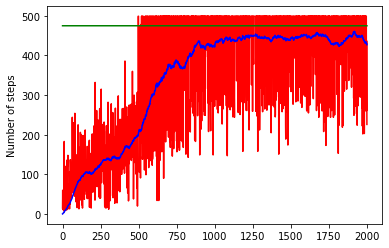

In [23]:
plt.plot(range(nbEpisodes), stepsHistory, 'r',
         range(nbEpisodes), (np.convolve(stepsHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 'b',
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes,'g')
plt.ylabel('Number of steps')
plt.show()

#### Preguntes

**1.** Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

**2.** Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

**3.** Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

**4.** Explica la funció `action = policy(state, decay)`. 

**5.** Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.

**6.** Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?

**7.** Explica la darrere gràfica retornada. Què s'hi representa?

**8.** Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.



#### Respostes

**1.** Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

L'***episodeCount*** és el nombre de vegades que volem repetir el procés d'aprenentatge. També podem dir que és el valor que creiem adient per tal d'aconseguir aquest aprenentatge en el model. En aquest cas inicialment s'anomena nbEpisodes i són 2000. Es faran 2000 repeticions del mateix codi amb l'objectiu d'incrementar l'experiència del programa en cada iteració i finalment aconseguir l'objectiu d'aguantar el pal.

L'***env.spec.max_episode_steps*** és el nombre màxim de passos que ha de fer per episodi, en arribar a aquest límit es considera que s'ha superat amb èxit l'execució. Es crida dins de la funció *doEpisodeMC()* per tal de comptar el nombre màxim de vegades, tot i que si abans d'acabar el pal ja ha caigut surt del for. Són valors posats per conveni i equivalen a 200 en el cas de la versió 0 i 500 en la versió 1, per tal de ser comparables entre diferents màquines.

D'aquesta manera, sabem que es faran 2000 vegades un nombre màxim de 200 moviments per tal de mantenir el pal dret. Fins que el model no té prou experiència i ha après aquest nombre de 200 es veu molt reduït. A mesura que s'incrementen les iteracions s'aguanta més passos dret.

**2.** Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

Les observacions són un vector que indica de forma ordenada la posició i velocitat del carro i l'angle i velocitat del pal. Per exemple, de la forma:

    [ 0.11874205 -0.02376394 -0.04158195  0.07575174]
 
Els valors de cadascun tenen una franja de:
 * **Posició del carro**: -4.8 a 4.8
 * **Velocitat del carro**: -inf a inf
 * **Angle del pal**: -24 graus a 24 graus (0.418rad)
 * **Velocitat del pal**: -inf a inf
 
A totes les observacions inicialment se les assigna un valor aleatori uniforme entre [-0.05...0.05]

**3.** Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

In [24]:
decayX = 0.02
decayY = 20
decay = max(-i_episode*decayX+decayY, 1/(i_episode+1))

La funció anterior calcula el decay utilitzat per a la resolució del problema. Es tracta de la funció decay que hem estudiat en l'apartat anterior *(1/(i_episode+1)* amb *beta=0*, però, a més a més, hi ha una altra opció que és *(-i_episode * decayX+decayY)*.

Aquest decay està pensat perquè per valors inicials d'iteracions l'exploració sigui molt més alta amb l'objectiu de conèixer molts dels estats possibles en què pot trobar problemes i bàsicament perquè el programa aprengui. A mesura que va aprenent i a mesura que s'incrementen les iteracions, passa a fer ús la segona forma de calcular-ho, de la manera que ja coneixíem, perquè cada cop tingui menys importància el percentatge d'exploració i es concentri en mantenir el pal amb els coneixements que ja ha obtingut.

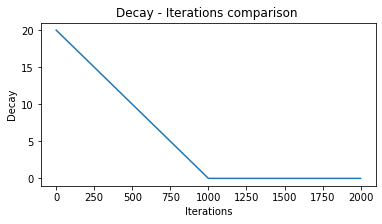

In [25]:
l = []
decayX = 0.02
decayY = 20
for i_episode in range(2000):
    l.append(max(-i_episode*decayX+decayY, 1/(i_episode+1)))
plt.figure(figsize=(6,3))
plt.plot(l)
plt.xlabel("Iterations")
plt.ylabel("Decay")
plt.title("Decay - Iterations comparison ")
plt.show()

**4.** Explica la funció `action = policy(state, decay)`. 

La funció ***policy()*** escull quin és el següent pas a donar segons un estat actual i un decay aplicant una política determinada.

El primer que fa és inicialitzar dues variables *maxValueAction* i *minCountAction* que guarden un 0 o un 1. Si l'estat que ha rebut encara no existeix el crea de nou al diccionari history i posa els valors count i value per defecte a 0. Cal dir, però, que s'afegeix 2 cops, un pel moviment cap a la dreta i l'altre pel moviment cap a l'esquerra. Posteriorment, tracta d'omplir aquests valors que abans es trobaven per defecte depenent de, o si és l'acció amb més valor, o si el comptador és més petit.

Això ens diu que si volem escollir entre el resultat que sabem que amb més probabilitat ens donarà un resultat esperat o si volem canviar i provar el resultat que hem provat menys cops. Aquesta decisió la pren el decay, ja que si no es troba en moment d'exploració optarà pel camí segur (*maxValueAction*) i, al contrari, el *minCountAction*.

Aquesta funció retorna un valor (0 o 1, dreta o esquerra) que s'emmagatzema en la variable action, la qual serà l'encarregada de realitzar una acció o altra.

**5.** Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.


Aquesta línia de codi es troba dins del for de, en aquest cas, 200 iteracions, a la funció ***doEpisodeMC()***. Per cada moviment que fa en cada pas d'un total de 200 com a màxim s'hi ha d'avaluar la situació i obtenir diferent informació que retorna la funció step().

A la variable *obs* s'emmagatzema un objecte amb l'observació de l'entorn (tal com s'ha explicat a l'exercici 2), pel que fa al *reward* és la recompensa d'aquest moviment en concret i que ens permet saber si hem de continuar per aquest camí o no, la variable *done* guarda un booleà per saber si és hora de restablir l'entorn de nou perquè aquest ja no ens permet continuar, és a dir, si el pal ha caigut. Per últim, la funció step() retorna un quart paràmetre amb diferent informació de diagnòstic útil per fer debugging, tot i que en aquest codi no s'utilitza i per aquest motiu no s'assigna a cap nom concret.

**6.** Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?


La funció **updatePolicyMC()** actualitza el diccionari history. Aquest guarda tots els estats pels quals ha passat prèviament, amb l'acció que s'ha fet i el reward mig. D'aquesta forma es manté un historial amb tots els "coneixements" que el model ha obtingut segons la seva evolució amb l'objectiu de no repetir els mateixos errors i distingir els nous entorns, aspecte que controla la funció policy() (ambdues comparteixen el diccionari history).

La forma en què s'atorga el reward és inversament proporcional al nombre de passos que porti l'execució. Durant els primers passos si es manté dret se li atorga més reward que si es tracta de les últimes execucions. Concretament, l'operació matemàtica que calcula el reward és la següent:

    (a['value'] * a['count'] + G) / (a['count'] + 1)

**7.** Explica la darrere gràfica retornada. Què s'hi representa?

En el eix de les 'x' tenim el nombre d'episodis i en el eix de les 'y' el nombre de steps per cada episodi que és l'interval de temps en el que el pal ha estat dret.

- Línes vermelles: és el temps que ha estat de peu el pal. COm podem observar a mesura que pasen els episodes, per tant, va aprenent, està més temps aguantant el pal.

- Línea blava: representa el promig del temps.

- Línea verda: és un valor que considera que l'agent ja a aprés.

Observem que sobre els 900 episodis ja es pot considerar que l'agent a après a agunatar el pal.

**8.** Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.